In [47]:
import numpy as np
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import time
NUM_BINS = 2
NUM_TRAINING = 102416306 - 2749898
NUM_QUAL = 2749898

In [48]:
# predictions on probe
probe_predictions = [#"data/kevin/probe/out_probe_svd_1.92.dta",
                     #"data/misc/all_mean_probe.dta",
                     "data/frank/SVDPP_prediction_probe4-04.dta",
                     #"data/kevin/probe/out_probe_knn_2.dta",
                     "data/james/probe/SVD_probe5-08.dta",
                     "data/james/probe/Time_SVDpp_probe6-50.dta",
                     "data/james/probe/baseline_probe.dta",
                     "data/james/probe/Time_SVDpp_paper_probe.dta",
                     "data/james/probe/SVDpp_probe5-46.dta",
                     "data/james/probe/FactorNM_probe.dta",
                     "data/kevin/probe/f_knn_p.dta",
                     "data/james/probe/time_probe_k_200.dta",
                     #"data/kevin/probe/f_rsvd_p.dta",
                     "data/james/probe/svdpp_200_probe.dta",
                     "data/james/probe/Time_SVD_probe200k.dta",
                     "data/james/probe/rsvd_probe200k.dta",
                     "data/james/probe/BEST_probe.dta"
        
                    ]                                    
# predictions on quiz
qual_predictions = [#"data/kevin/qual/out_qual_svd_1.92.dta",
                    #"data/misc/all_mean_qual.dta",
                    "data/frank/SVDPP_prediction_qual4-04.dta",
                    #"data/kevin/qual/out_qual_knn_2.dta"
                    "data/james/qual/SVD_qual5-08.dta",
                    "data/james/qual/Time_SVDpp_qual6-50.dta",
                    "data/james/qual/baseline_qual.dta",
                    "data/james/qual/Time_SVDpp_paper_qual.dta",
                    "data/james/qual/SVDpp_qual5-46.dta",
                    "data/james/qual/FactorNM_qual.dta",
                    "data/kevin/qual/f_knn_q.dta",
                    "data/james/qual/time_qual_k_200.dta",
                    #"data/kevin/qual/f_rsvd_q.dta"
                    "data/james/qual/svdpp_200_qual.dta",
                    "data/james/qual/Time_SVD_qual200k.dta",
                    "data/james/qual/rsvd_qual200k.dta",
                    "data/james/qual/BEST_qual.dta"
                    ]
num_models = 0

In [49]:
# check if length of probe_predictions matches length of quiz predictions
if len(probe_predictions) == len(qual_predictions):
    num_models = len(probe_predictions)
    print("GOOD TO GO")
else:
    print("WE HAVE A PROBLEM")

GOOD TO GO


In [50]:
# load predictions on probe
X_train = []
for preds in probe_predictions:
    X_train.append(np.loadtxt(preds).astype(float))
# load probe (just the ratings)
probe = np.loadtxt('probe_ratings.dta').astype(int)

In [51]:
# load predictions on quiz
X_test = []
for preds in qual_predictions:
    X_test.append(np.loadtxt(preds).astype(float))

In [52]:
# load probe (user, movie, time)
probe_etc = np.loadtxt('probe.dta', usecols = (0,1,2)).astype(int)
print(probe_etc)
# load qual (user, movie, user, time)
qual_etc = np.loadtxt('qual.dta', usecols = (0,1,2)).astype(int)
print(qual_etc)

[[     1  14708   2160]
 [     1  16933   2160]
 [     2   3912   2039]
 ...
 [458292  13157   2211]
 [458292  14582   2184]
 [458293   8578   2224]]
[[     1   4624   2160]
 [     1   7218   2160]
 [     1   8346   2160]
 ...
 [458293  12636   2232]
 [458293  15905   2224]
 [458293  17425   2236]]


In [53]:
# Transpose the matrices so they have dimension NUM_QUAL/NUM_PROBE x num_models
X_train = np.array(X_train).T
# X_train = np.concatenate((X_train, probe_etc), axis = 1)
print(X_train.shape)
X_test = np.array(X_test).T
# X_test = np.concatenate((X_test, qual_etc), axis = 1)
print(X_test.shape)

(1374739, 13)
(2749898, 13)


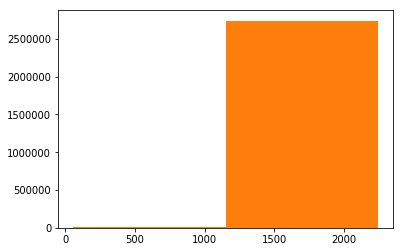

In [54]:
# get the time aspect 
probe_time = probe_etc[:,2]
qual_time =  qual_etc[:,2]
(n, bins_p, patches) = plt.hist(probe_time, bins = NUM_BINS)
(n, bins_q, patches) = plt.hist(qual_time, bins = NUM_BINS)

In [55]:
# probe stuff
probe_bins = [[] for i in range(NUM_BINS + 1)]   # length is number of bins
probe_segs = [[] for i in range(NUM_BINS + 1)]  # length is number of bins

In [56]:
# populate probe_bins and probe_segs
probe_bin_indices = np.digitize(probe_time, bins_p) - 1 # length of probe_ratings
for i in range(len(probe)):
    bin_number = probe_bin_indices[i]
    probe_bins[bin_number].append(X_train[i])
    probe_segs[bin_number].append(probe[i])

In [57]:
print(len(probe_bins))
print(len(probe_segs))

3
3


In [58]:
# n_est = 50
# step_size = int((150 - 50) / NUM_BINS)
# print("Starting number of estimators: ", n_est)
# print("Step size: ", step_size)
# print("Number of bins: ", NUM_BINS)

models = []
for k in range(NUM_BINS + 1):
    print(k, n_est)
#     n_estimators = n_est
    model = XGBRegressor()
    model.fit(probe_bins[k], probe_segs[k])
    models.append(model)
#     n_est += step_size
    

0 143
1 143
2 143


In [59]:
# print(ratings)

In [60]:
qual_bins = [[] for i in range(NUM_BINS + 1)]  # length is number of bins
qual_bin_indices = np.digitize(qual_time, bins_q) - 1 # length of probe_ratings

for i in range(len(X_test)):
    row = np.concatenate([[i], X_test[i]])
    bin_number = qual_bin_indices[i]
    qual_bins[bin_number].append(row)

In [62]:
ratings = [None] * NUM_QUAL
for i in range(len(qual_bins)):
    mat = np.array(qual_bins[i])
    indices = mat[:,0]
    new_mat = np.delete(mat, 0, 1)
    model = models[i]
    r = model.predict(new_mat)
    for k in range(len(indices)):
        ratings[int(indices[k])] = r[k]

In [63]:
ratings = np.clip(ratings, 1, 5)

f = open("output/boosting_time_bin.dta", "w+")

for i in range(len(ratings)):
    f.write(str(ratings[i]) + '\n')
f.close()